### Importing Libraries

In [93]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.preprocessing import LabelEncoder

### Loading Dataset

In [96]:
df = pd.read_csv("data/Wholesale customers data.csv")


In [98]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


### CLASS DISTRIBUTION AND FREQUENCY ANALYSIS FOR REGION COLUMN

In [101]:
num_classes = df['Region'].nunique() 
print(num_classes)
class_frequencies = df['Region'].value_counts()
print(class_frequencies)


3
Region
3    316
1     77
2     47
Name: count, dtype: int64


In [103]:
for class_name, frequency in class_frequencies.items():
    print(f"Class: {class_name}, Frequency: {frequency}")


Class: 3, Frequency: 316
Class: 1, Frequency: 77
Class: 2, Frequency: 47


In [105]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Visualization

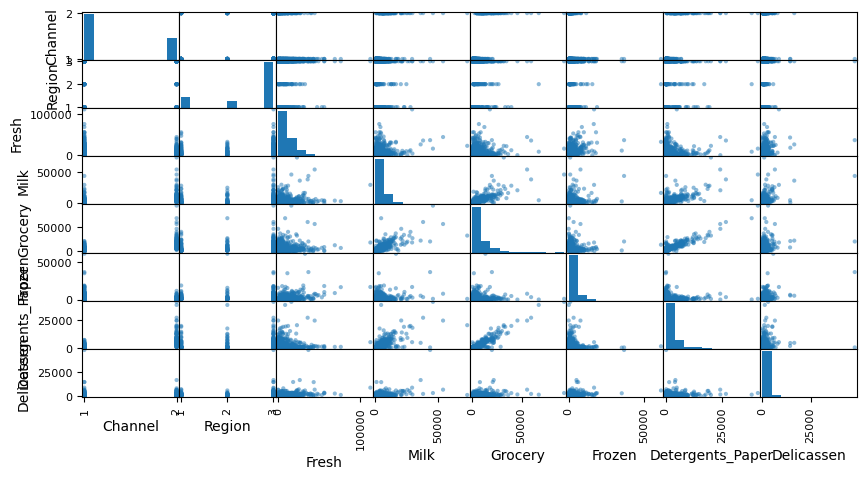

In [108]:
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize=(10,5))

# Save the figure to the 'plots' folder
plt.savefig('plots/DecisionTree_1.png')

# Optionally, display the plot
plt.show()


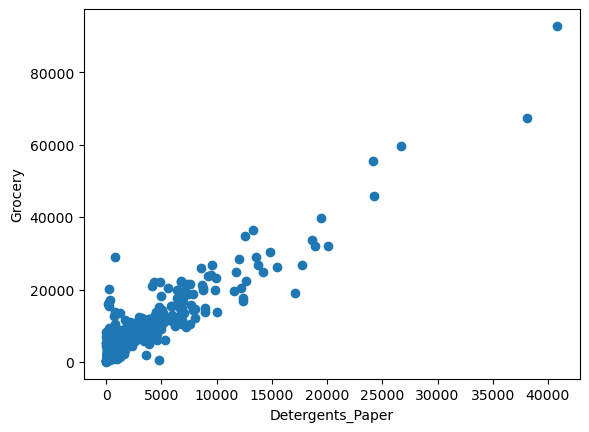

In [109]:
plt.scatter(df.Detergents_Paper, df.Grocery)
plt.xlabel("Detergents_Paper")
plt.ylabel("Grocery")
plt.savefig('plots/DecisionTree_2.png')
plt.show()

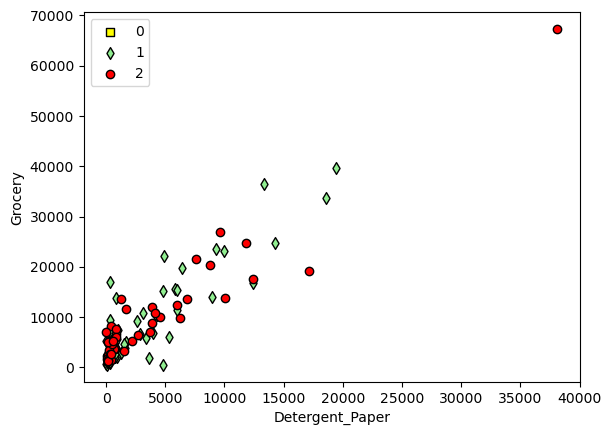

In [110]:

d = np.array(df)
plt.scatter(
    d[d[:,1] == 0, 6], d[d[:,1] == 0, 4],
    c='yellow', marker='s', edgecolor='black',
    label='0'
)


plt.scatter(
    d[d[:,1] == 1, 6], d[d[:,1] == 1, 4],
    c='lightgreen', marker='d', edgecolor='black',
    label='1'
)
plt.scatter(
    d[d[:,1] == 2, 6], d[d[:,1] == 2, 4],
    c='red', marker='o', edgecolor='black',
    label='2'
)

plt.xlabel('Detergent_Paper')
plt.ylabel('Grocery')
plt.legend(loc="upper left")

plt.savefig('plots/DecisionTree_3.png')
plt.show()

In [114]:
X = df.drop("Region", axis='columns')  # Features (excluding the target column)
y = df["Region"]  # Target variable

### Splitting the Data

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Print the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (308, 7)
Test data shape: (132, 7)


## Training a decision tree classifier

In [120]:
model = DecisionTreeClassifier(max_depth=5)  # Limiting depth to prevent overfitting
model.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=5)

In [122]:
y_hat = model.predict(X_test)


In [124]:
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

In [126]:
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 0.7564935064935064
Test Accuracy: 0.6818181818181818


In [128]:
cm = confusion_matrix(y_test, y_hat)


In [130]:
print("Confusion Matrix:")
print(cm)



Confusion Matrix:
[[ 0  0 23]
 [ 0  1 10]
 [ 8  1 89]]


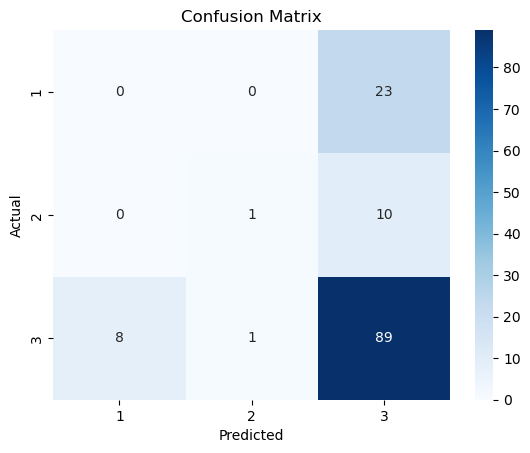

In [132]:
import seaborn as sns
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.savefig('plots/DecisionTree_4.png')
plt.show()

In [134]:
# do cross validation to get best depth 
from sklearn.model_selection import cross_val_score
for d in range(2,10) :
    model = DecisionTreeClassifier(max_depth=d)
    scores = cross_val_score(model, X_train, y_train, cv=5)
    # print(scores)
    print("d: ", d, " val accuracy: ", scores.mean())

d:  2  val accuracy:  0.672184029613961
d:  3  val accuracy:  0.6558963511369645
d:  4  val accuracy:  0.6493389740877842
d:  5  val accuracy:  0.6265996827075622
d:  6  val accuracy:  0.6200951877313591
d:  7  val accuracy:  0.5874669487043892
d:  8  val accuracy:  0.5551560021152828
d:  9  val accuracy:  0.55193019566367


In [136]:
# Create the decision tree
model = DecisionTreeClassifier(max_depth=2)
# tree = DecisionTreeClassifier()
model.fit(X_train,y_train)
model.get_depth()

2

In [138]:
# Training Accuracy
print("Training Accuracy:", model.score(X_train, y_train))

Training Accuracy: 0.7272727272727273


In [140]:

# Test Accuracy
print("Test Accuracy:", model.score(X_test, y_test))


Test Accuracy: 0.6818181818181818


In [142]:
# Get predictions
y_hat = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_hat))

Test Accuracy: 0.6818181818181818


In [144]:
cm = confusion_matrix(y_test, y_hat)

print(cm)

[[ 0  0 23]
 [ 0  0 11]
 [ 8  0 90]]


In [146]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [147]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [148]:
pip install graphviz pydotplus


Note: you may need to restart the kernel to use updated packages.


### Visualizing Decision Tree Model for Classification

<Figure size 640x480 with 0 Axes>

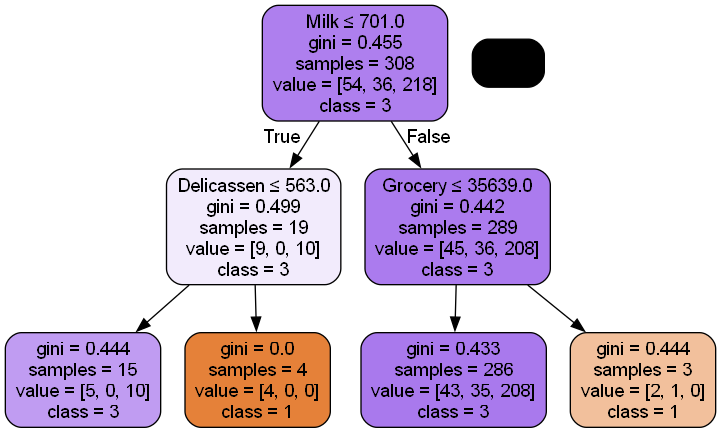

In [157]:
# Draw the tree
feature_names = ["Channel","Fresh","Milk","Grocery","Frozen","Detergents_Paper","Delicassen"]
target_names = ["1", "2", "3"]
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_names, class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('plots/decision_tree5.png')
plt.savefig('plots/DecisionTree_3.png')
plt.show()
Image(graph.create_png())
